In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [38]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-39b

In [39]:
df = pd.read_csv("WASP_39b_literature.csv")#, header=None)
df = df.set_index('Parameter')
df = df.drop(columns=df.columns[0])


In [40]:
df

,Ivshina & Winn 2022,Mancini et al. 2018,Bonomo et al. 2017,Barstow et al. 2017,Fischer et al. 2016,Maciejewski et al. 2016,Sing et al. 2016,Ricci et al. 2015,ExoFOP-TESS TOI
Parameter,,,,,,,,,
a,---,0.04828+/-0.00082,0.04859+0.00051-0.00053,---,---,0.04858+/-0.00052,---,---,---
a/R*,---,---,---,---,11.55+/-0.13,11.37+0.24-0.20,---,11.32+/-0.42,---
i,---,87.32+/-0.17,87.83+0.25-0.22,---,87.93+/-0.14,87.75+0.27-0.20,---,87.78+/-0.43,---
P,4.05527892+/-0.00000086,4.0552941+/-0.0000034,4.05529470+/-0.00000097,---,4.05527999+/-0.00000070,4.0552765+/-0.0000035,4.06,4.0552947+/-0.000000965,4.05486954695085+/-0.00022036895000
R,---,1.279+/-0.040,1.270+/-0.040,---,---,1.332+0.034-0.031,1.27,---,1.38680641672392+/-0.09088870141422
RpRs,---,---,---,---,---,0.1457+0.0015-0.0016,---,0.1424+/-0.0023,---
e,---,---,<0.048,---,---,---,---,0,---
colour,#ff7f0e,#2ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf


In [41]:
df_ref_list = df.columns

# df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']

# e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)

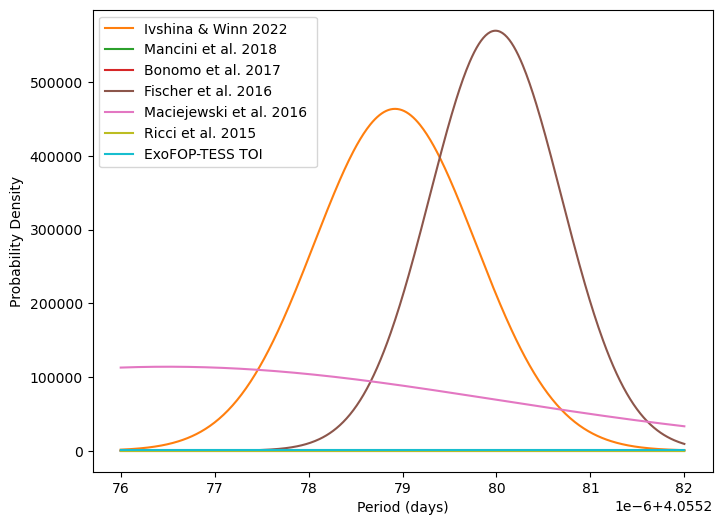

In [53]:
fig, ax = plt.subplots(1, figsize=(8,6))

# x = np.linspace(4.055276, 4.055283, 500)
x = np.linspace(4.055276, 4.055282, 500)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

#Same graph seen in https://doi.org/10.1093/mnras/stac661

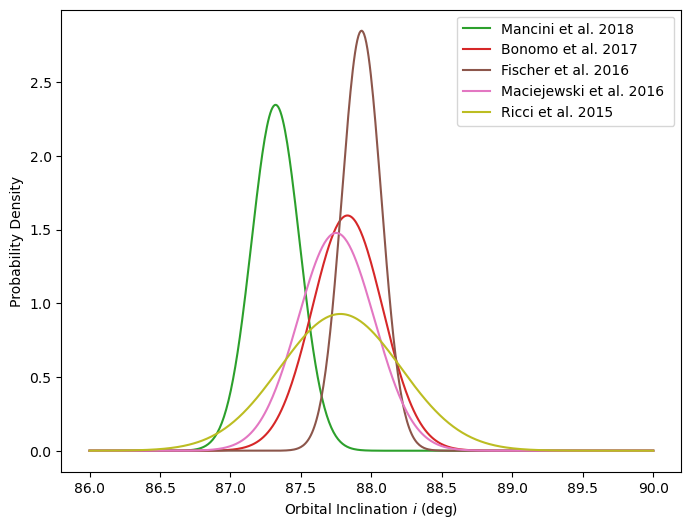

In [43]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(86, 90, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital Inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

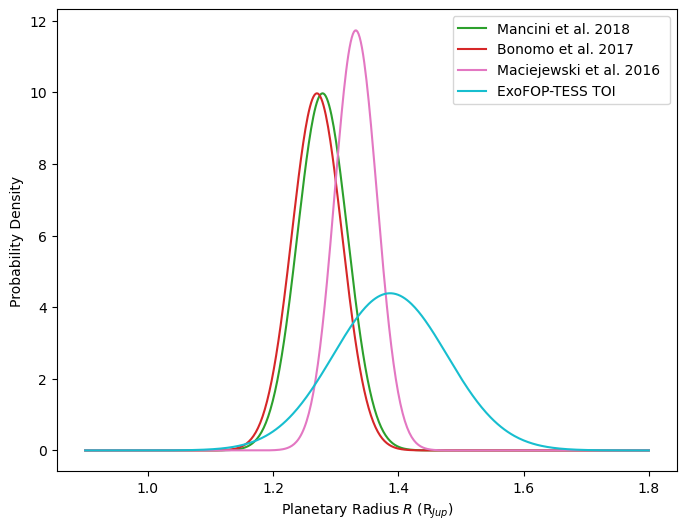

In [44]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.9, 1.8, 500)
for R_obj, author in zip(R_list, R_ref_list):
    mu, upper, lower = R_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planetary Radius $R$ (R$_{Jup}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

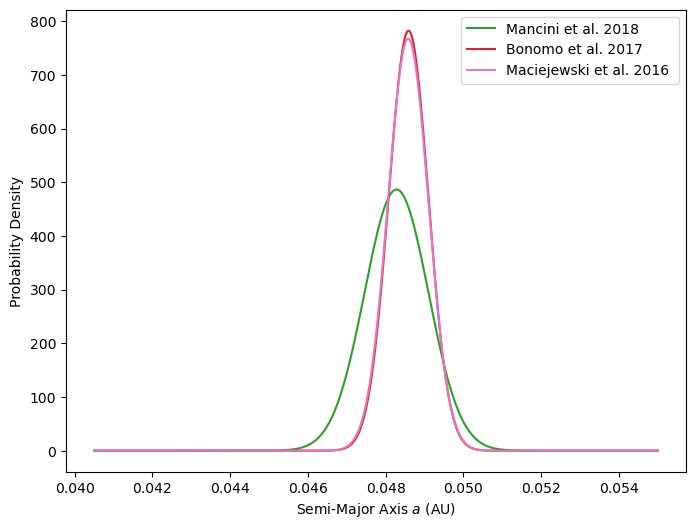

In [45]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0405, 0.055, 1000)
for a_obj, author in zip(a_list, a_ref_list):
    mu, upper, lower = a_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Semi-Major Axis $a$ (AU)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

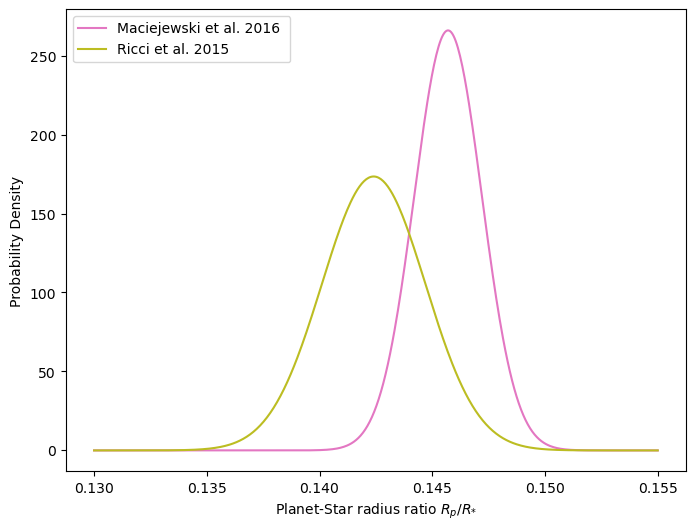

In [46]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.13, 0.155, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

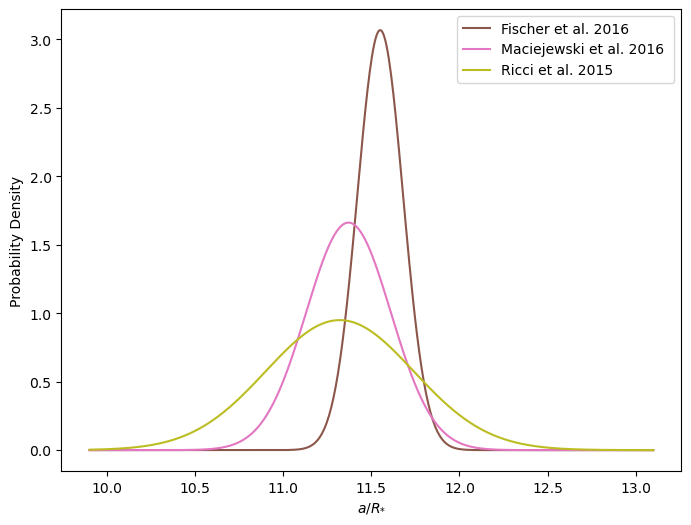

In [47]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(9.9, 13.1, 500)
for i_obj, author in zip(a_Rs_list, a_Rs_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"$a/R_{*}$")
plt.ylabel("Probability Density")
ax.legend()
plt.show()